# TIFF images 

To work with **tiff** images, the [pillow (PIL)](https://pillow.readthedocs.io/en/5.1.x/) python library can be used. 

In [1]:
from PIL import Image
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os

## load data 

Let's define the location of the file to load

In [2]:
tiff_file = '../Data/Images/test_image.tiff'
assert os.path.exists(tiff_file)

load the data

In [3]:
image = Image.open(tiff_file)

In [4]:
type(image)

PIL.TiffImagePlugin.TiffImageFile

Let's convert this funny object into a numpy array

In [5]:
data = np.asarray(image)
print("shape is: {}".format(np.shape(data)))
print("type is: {}".format(type(data)))

shape is: (2048, 2048)
type is: <class 'numpy.ndarray'>


## plot data

<IPython.core.display.Javascript object>


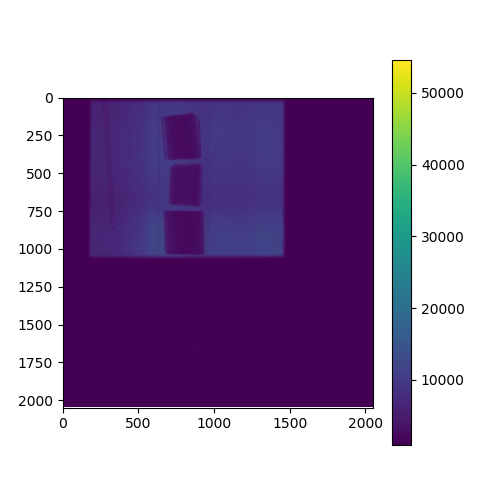

In [10]:
f, ax = plt.subplots(figsize=(5,5))
cax = ax.imshow(data)
f.colorbar(cax)

Let's first crop the data by changing the x and y ranges. As usual make sure you check the documentation [google "python matplotlib axis"](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html).

<IPython.core.display.Javascript object>


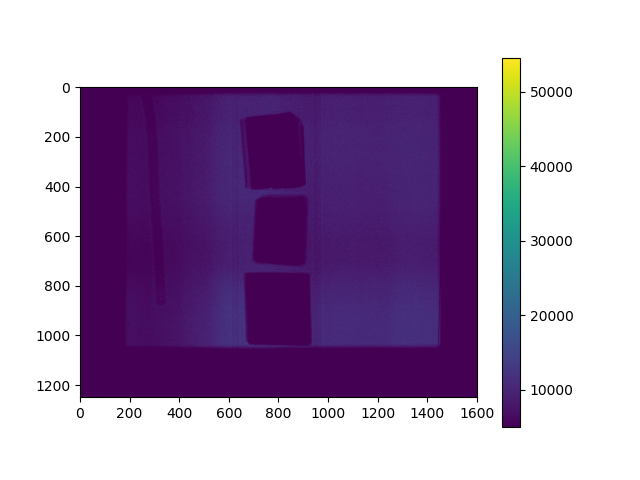

In [49]:
f2,ax2=plt.subplots()
cax2=ax2.imshow(data,vmin=5000)
f2.colorbar(cax2)
ax2.set_ylim((1250,0))
ax2.set_xlim((0,1600))

data_cropped = data[0: 1250, 0: 1600]

Now, let's adjust the colorbar colorbar type. 

By default Matplotlib uses 'viridis'. But you can easily choose another [colormap](https://matplotlib.org/examples/color/colormaps_reference.html)

<IPython.core.display.Javascript object>


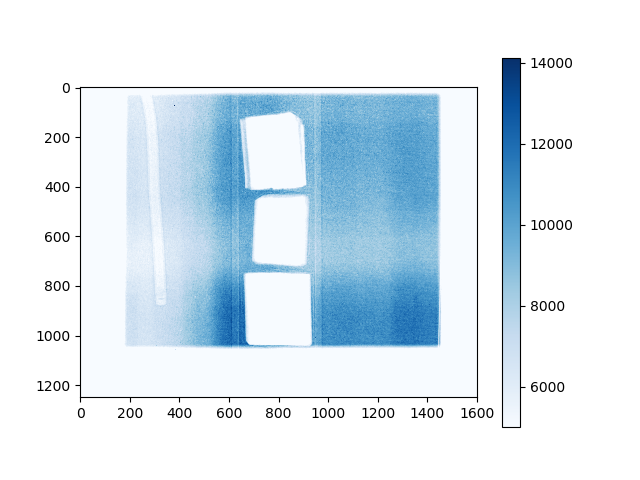

In [51]:
f2,ax2=plt.subplots()
cax2=ax2.imshow(data_cropped,vmin=5000, cmap="Blues")
f2.colorbar(cax2)

## Profile

To extract a given row (or column) we use array indexing.

Let's isolate the full column **#800** (remember the 0 array indexing in python)

In [52]:
profile = data_cropped[:,799]

And now we can display that profile

<IPython.core.display.Javascript object>


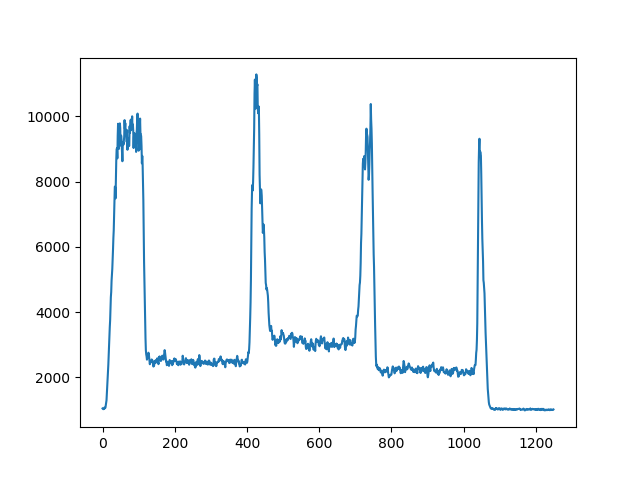

In [53]:
f3, ax3 = plt.subplots()
ax3.plot(profile)

### Exercises

Using profile by **row**, can you figure out the starting and last row of sample 3 (see drawing)

<img src="../Data/static/python_introduction/data_profile.png" >

<IPython.core.display.Javascript object>


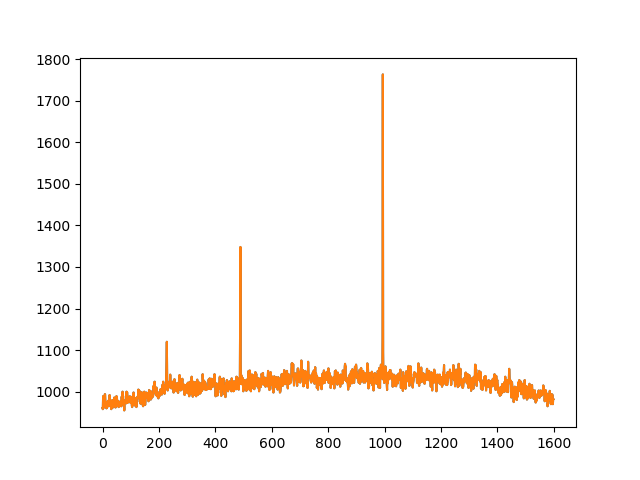

In [54]:
row_start = 0
row_end = 0

profile_start = data_cropped[row_start, :]
profile_end = data_cropped[row_end, :]
f4, ax4 = plt.subplots()
ax4.plot(profile_start)
ax4.plot(profile_end)

Don't you think it's a little bit annoying to change manually the values and re-run the cell every time to get the plot ?

There must be a better way!!!

Ansewr: YES. Welcome to the **widgets** tool

In [55]:
from ipywidgets import widgets, interact
import matplotlib.patches as patches

<IPython.core.display.Javascript object>


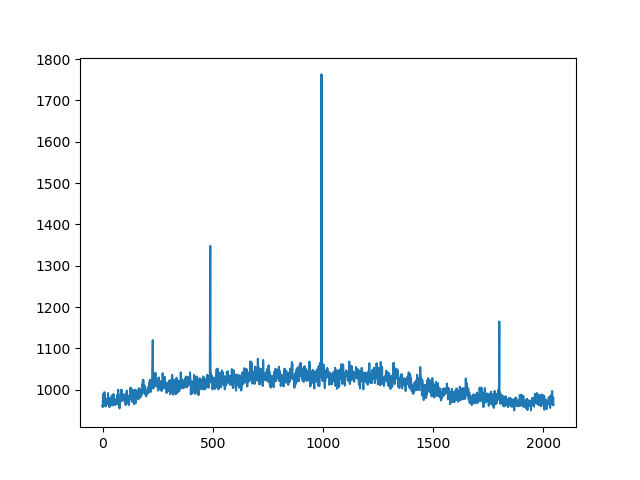

interactive(children=(IntSlider(value=0, description='row', max=1249), Output()), _dom_classes=('widget-intera…

<function __main__.plot_profile(row)>

In [56]:
[height, width] = np.shape(data_cropped)
f5, ax5 = plt.subplots()

def plot_profile(row):
    
    profile = data[row, :]
    ax5.clear()
    ax5.plot(profile)
    
interact(plot_profile,
        row=widgets.IntSlider(value=0,
                                 min=0,
                                 max=height-1))

Want to learn more about widgets? Check the [jupyter widgets documentation](https://ipywidgets.readthedocs.io/en/stable/user_install.html) where you will find [a list of widgets available via the notebooks](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)

## Bonus

In [57]:
import matplotlib.patches as patches

<IPython.core.display.Javascript object>


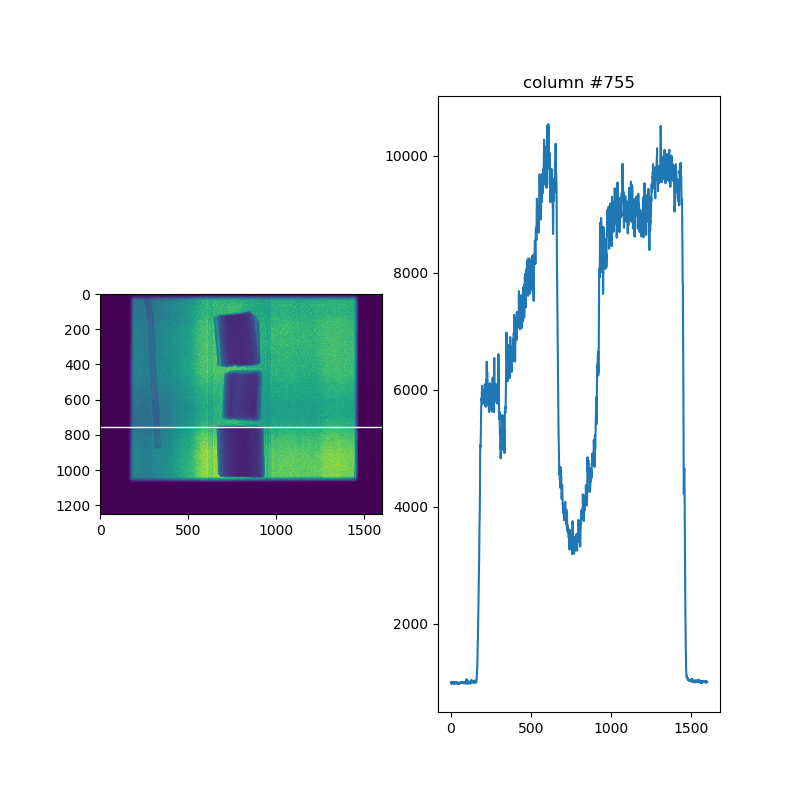

interactive(children=(IntSlider(value=0, description='column', max=1249), Output()), _dom_classes=('widget-int…

<function __main__.plot_profile(column)>

In [58]:
f6, ax6 = plt.subplots(1, 2, figsize=(8,8)) # 1 row, 2 columns
def plot_profile(column):
    
    profile = data_cropped[column, :]
    ax6[0].clear()
    ax6[0].imshow(data_cropped)
    
    _line = patches.Rectangle((0, column), # top left corner of rectangle
                              width, # width of rectangle (entire width of image)
                              1,  # height of rectangle (1 pixel)
                              edgecolor = 'white',
                              linewidth = 1,
                              fill = False)
    ax6[0].add_patch(_line)
                             
    ax6[1].clear()
    ax6[1].plot(profile)
    ax6[1].set_title("column #{}".format(column))
    
interact(plot_profile, 
         column=widgets.IntSlider(value=0,
                                 min=0,
                                 max=height-1))

## extract metadata 

In [14]:
from PIL.ExifTags import TAGS

Since we still have an instance to the tiff file, we can look at any of the Meta data

In [62]:
metadata = image.tag_v2
for _key, _value in metadata.items():
    print("{}: {}".format(_key, _value))

65024: NumImages:5
65025: ImageCounter:132
65026: MinX:0
65027: MinY:0
65028: SizeX:2048
65029: SizeY:2048
65030: Temperature:-60.000000
65031: TemperatureActual:-59.777000
65032: MotScanDeviceStr:Small Rot
65033: RotationActual:359.549920
65034: MotLiftTable.RBV:249.992768
65035: MotLiftTable:250.000000
65036: MotShortAxis.RBV:30.003000
65037: MotShortAxis:30.000000
65038: MotLongAxis.RBV:105.001000
65039: MotLongAxis:105.000000
65040: MotRotTable.RBV:181.999000
65041: MotRotTable:182.000000
65042: MotSmallRotTable.RBV:359.549920
65043: MotSmallRotTable:359.550000
65044: MotZaberRot.RBV:-0.003056
65045: MotZaberRot:0.000000
65046: MotDetTable.RBV:200.000000
65047: MotDetTable:200.000000
65048: MotCameraVert.RBV:-51.699796
65049: MotCameraVert:-51.699796
65050: MotHoriTrans.RBV:28.000000
65051: MotHoriTrans:28.000000
65052: MotVertTrans.RBV:60.000000
65053: MotVertTrans:60.000000
65054: MotDiffuser.RBV:86.300000
65055: MotDiffuser:86.300000
65056: MotAperture.RBV:189.700000
65057: MotA

We are done working with our file, let's close it!

In [63]:
image.close()